In [19]:
import pickle
import numpy as np
import os
import torch
import torch.nn as nn
import re
import sys
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

root = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(root)

from sr_model.models.models import AnalyticSR, STDP_SR
from datasets import inputs
import configs

device = 'cpu'

In [20]:
with open(f'{configs.engram_dir}02_gamma_v_rstep/results.p', 'rb') as f:
    results = pickle.load(f)

In [21]:
for key in results.keys():
    results[key] = np.array(results[key])

In [22]:
results.keys()

dict_keys(['gammas', 'rsteps', 'vals'])

In [23]:
gammas = results['gammas']
rsteps = results['rsteps']
vals = results['vals']

In [24]:
xs = np.sort(np.unique(gammas))
ys = np.sort(np.unique(rsteps))

## Plot test loss for different gammas and recurrent steps

In [25]:
import matplotlib as mpl

/var/folders/jf/2_wn4hjd11q9klftv_v_hld80000gn/T/ipykernel_7385/2555788124.py:9: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  pcm = plt.imshow(


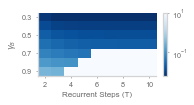

In [27]:
mat = np.zeros((xs.size, ys.size))*np.nan
for x_idx, x in enumerate(xs):
    for y_idx, y in enumerate(ys):
        idxs = np.logical_and(gammas==x, rsteps==y)
        val = vals[idxs]
        mat[x_idx][y_idx] = np.mean(val)

plt.figure(figsize=(2.75, 1.5))
pcm = plt.imshow(
    mat, cmap="Blues_r", vmax=10,
    norm=mpl.colors.LogNorm(), aspect='auto'
    )
plt.colorbar(pcm)
plt.xticks(np.arange(ys.size)[::2], ys[::2])
plt.yticks(np.arange(len(xs))[::2], xs[::2])
plt.xlabel('Recurrent Steps (T)')
plt.ylabel('$\gamma_B$')
plt.tight_layout()
plt.savefig("../figures/S3a.png", dpi=300, transparent=True)
plt.show()